In [1]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import numpy as np
import pandas as pd
import scipy

# Instansiate the Plotly charting library.
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
# We use plotly.offline as this allows us to create interactive 
# visualisations without the use of an internet connection, 
# making our notebook more distributable to others. 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# The Cufflinks library allows us to directly bind 
# Pandas dataframes to Plotly charts. 
import cufflinks as cf
# Once again we use the Cufflinks library in offline mode. 
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options. We use these to make our interactive 
# visualisations more aesthetically appealing. 
from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from ipywidgets import interact, interact_manual, widgets

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [3]:
df = pd.read_csv('data/freeman_well_4_eng.csv')

In [4]:
df.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,Facies_code
0,7682.5,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
1,7683.0,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
2,7683.5,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
3,7684.0,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
4,7684.5,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0


<AxesSubplot:>

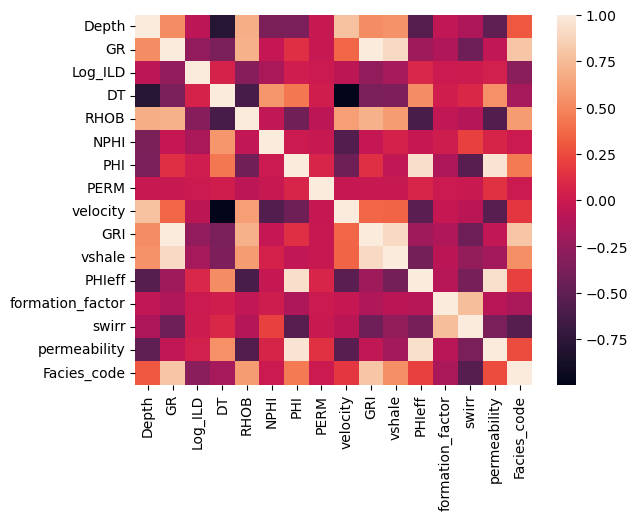

In [6]:
import seaborn as sns
sns.heatmap(df.corr())

Depth              -0.017778
GR                 -0.016985
Log_ILD            -0.000880
DT                  0.027767
RHOB               -0.069722
NPHI               -0.015865
PHI                 0.075397
PERM                1.000000
velocity           -0.024939
GRI                -0.016985
vshale             -0.016468
PHIeff              0.074888
formation_factor   -0.000836
swirr              -0.006747
permeability        0.138506
Facies_code         0.001706
dtype: float64


<AxesSubplot:>

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Correlation with target')

Text(0.5, 1.0, 'Correlation between features and target variable')

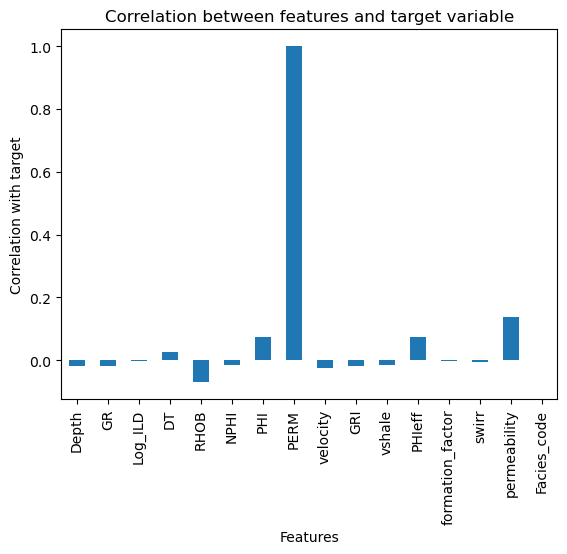

In [8]:
# Calculate the correlation coefficients between features and the target variable
import matplotlib.pyplot as plt
corr_with_target = df.corrwith(df['PERM'])

# Display the correlation coefficients
print(corr_with_target)

corr_with_target.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Features')
plt.ylabel('Correlation with target')
plt.title('Correlation between features and target variable')
plt.show()

In [6]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()

In [7]:
df['Facies_code'].count()

7265

In [8]:
df['Facies']= lab_enc.fit_transform(df['Facies_code'])

In [9]:
df['Facies'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI',…

In [11]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    if x == y:
        print(f"Please select seperate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers', 
                 xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')
        ## if you are using Google Colab, comment out the above line of code and uncomment the lines below
        #fig = px.scatter(df, x=x, y=y, title=f'{y.title()} vs {x.title()}')
        #fig.show(renderer="colab")

interactive(children=(Dropdown(description='x', options=('Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI', 'PHI'…

In [12]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

# We use the Figure Factory module of Plotly, which
# defines many unique and powerful plots to be used
# in Python. 
# For more info, see: https://plot.ly/python/figure-factory-subplots/
import plotly.figure_factory as ff

corrs = df.corr()

@interact
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)
    ## if you are using Google Colab, comment out the above line of code and uncomment the line below
    #figure.show(renderer="colab")

interactive(children=(Dropdown(description='colorscale', options=('Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Blue…

In [13]:
@interact_manual
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    if x == y:
        print(f"Please select seperate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers', 
                 xTitle=x.title(), yTitle=y.title(), 
                 text='Depth',
                 title=f'{y.title()} vs {x.title()}',
                theme=theme, colorscale=colorscale)
        ## if you are using Google Colab, comment out the above line of code and uncomment the line below
        #fig = px.scatter(df, x=x, y=y, title=f'{y.title()} vs {x.title()}')
        #fig.show(renderer="colab")

interactive(children=(Dropdown(description='x', options=('Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI', 'PHI'…

In [14]:
print(df.columns)

Index(['Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI', 'PHI', 'PERM',
       'velocity', 'GRI', 'vshale', 'PHIeff', 'formation_factor', 'swirr',
       'permeability', 'Facies_code', 'Facies'],
      dtype='object')


In [15]:
# Define input features and target variable
X = df[['Depth', 'Log_ILD', 'NPHI','RHOB', 'vshale', 'PHIeff', 'swirr', 'Facies_code']]
y = df['PERM']

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 5 features based on F-value scores
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)].tolist()


In [25]:
selected_features

['Depth', 'NPHI', 'RHOB', 'vshale', 'PHIeff']

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import joblib

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define dictionary of models and their hyperparameters
models = {
    'svm': {
        'model': make_pipeline(StandardScaler(), SVR()),
        'params': {
            'svr__kernel': ['linear', 'rbf', 'poly'],
            'svr__C': [0.1, 1, 10],
            'svr__gamma': ['scale', 'auto']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [10, 20, 30]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'neural_network': {
        'model': MLPRegressor(),
        'params': {
            'hidden_layer_sizes': [(10,), (20,), (30,)],
            'activation': ['relu', 'tanh', 'logistic']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'learning_rate': [0.05, 0.1, 0.2],
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7]
        }
    }
}

In [18]:
scores = []
# Loop over each model and perform grid search with cross-validation to find best hyperparameters 
## scoring='neg_mean_squared_error'
for model_name, model in models.items():
    clf = GridSearchCV(model['model'], model['params'], cv=5, n_jobs=-1, return_train_score=False)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    
    # Evaluate best model on test set
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = clf.score(X_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': best_params,
        'RMSE': rmse,
        'R-squared': r2
    })
    # Save the best model for each method
    joblib.dump(clf.best_estimator_, f"models/{model_name}_best_model.pkl")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'poly']})

['models/svm_best_model.pkl']

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 150]})

['models/random_forest_best_model.pkl']

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

['models/decision_tree_best_model.pkl']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

['models/neural_network_best_model.pkl']

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

['models/gradient_boosting_best_model.pkl']

In [19]:
best_model_df = pd.DataFrame(scores, columns=['model', 'best_params', 'best_score', 'RMSE', 'R-squared'])
best_model_df

,model,best_params,best_score,RMSE,R-squared
0,svm,"{'svr__C': 10, 'svr__gamma': 'auto', 'svr__ker...",0.241980,1493.445192,0.081268
1,random_forest,"{'max_depth': 10, 'n_estimators': 50}",0.686534,585.373483,0.858851
2,decision_tree,"{'max_depth': 15, 'min_samples_split': 2}",0.693036,204.671411,0.982745
3,neural_network,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-0.000932,1558.893863,-0.001022
4,gradient_boosting,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.711957,246.197386,0.975032


In [21]:
best_model_df.to_csv('data/best_model.csv', index=False)

In [22]:
# Load the models from the model folder
model_rf = joblib.load('models/random_forest_best_model.pkl')
model_dt = joblib.load('models/decision_tree_best_model.pkl')
model_gb = joblib.load('models/gradient_boosting_best_model.pkl')

In [27]:
# Predict y values for x_test
y_pred_rf = model_rf.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

X_test_df = pd.DataFrame(X_test, columns=['Depth', 'Log_ILD', 'NPHI', 'RHOB', 'vshale', 'PHIeff'])

# Create a dataframe with x_test, y_test, and y_predict
results_df = pd.DataFrame({'Depth': X_test_df['Depth'],
                           'Log_ILD': X_test_df['Log_ILD'],
                           'NPHI': X_test_df['NPHI'],
                           'RHOB': X_test_df['RHOB'],
                           'vshale': X_test_df['vshale'],
                           'effective porosity': X_test_df['PHIeff'],
                           'Actual Permeability': y_test,
                           'rf_Permeability': y_pred_rf,
                           'dt_Permeability': y_pred_dt,
                           'gb_Permeability': y_pred_gb})

# Print the dataframe
results_df.to_csv('results_test.csv', index=False)
results_df.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,effective porosity,Actual Permeability,rf_Permeability,dt_Permeability,gb_Permeability
2253,8828.0,0.8841,0.4800,2.3139,0.306179,0.149672,5.545289,5.634187,5.558085,5.174887
4033,9722.0,0.9615,0.4132,2.3808,0.289862,0.107258,0.711243,0.675668,0.701661,0.743880
5023,10218.0,1.3877,0.4481,2.3733,0.425534,0.094078,0.895380,0.860429,0.886630,0.902038
6946,11183.0,0.8397,0.4304,2.4282,0.318960,0.071759,0.165991,0.174217,0.159611,0.255967
2005,8704.0,1.9346,0.3475,2.1625,0.176851,0.268002,580.378588,564.311013,580.378588,564.701738


In [26]:
# Predict y values for x_test
y_pred_rf_train = model_rf.predict(X_train)
y_pred_dt_train = model_dt.predict(X_train)
y_pred_gb_train = model_gb.predict(X_train)

X_train_df = pd.DataFrame(X_train, columns=['Depth', 'Log_ILD', 'NPHI', 'RHOB', 'vshale', 'PHIeff'])

# Create a dataframe with x_test, y_test, and y_predict
train_df = pd.DataFrame({'Depth': X_train_df['Depth'],
                           'Log_ILD': X_train_df['Log_ILD'],
                           'NPHI': X_train_df['NPHI'],
                           'RHOB': X_train_df['RHOB'],
                           'vshale': X_train_df['vshale'],
                           'effective porosity': X_train_df['PHIeff'],
                           'Actual Permeability': y_train,
                           'rf_Permeability': y_pred_rf_train,
                           'dt_Permeability': y_pred_dt_train,
                           'gb_Permeability': y_pred_gb_train})

# Print the dataframe
train_df.to_csv('results.csv', index=False)
train_df.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,effective porosity,Actual Permeability,rf_Permeability,dt_Permeability,gb_Permeability
6093,10756.5,22.5621,0.1593,2.1219,0.004503,0.118497,0.205152,0.176616,0.197230,0.175118
2740,9071.5,0.7576,0.4247,2.2883,0.216062,0.178848,12.186757,12.150200,12.186757,10.697760
629,8000.0,1.0501,0.4465,2.2703,0.289003,0.181074,21.176923,20.875478,21.176923,18.171596
6717,11068.5,0.8401,0.4171,2.3807,0.317622,0.103639,0.714526,0.678773,0.722505,0.743880
5907,10660.0,1.6668,0.3941,2.3836,0.321235,0.101255,0.654669,0.665883,0.660395,0.683380
